In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:

df = pd.read_csv("C:/Users/RONAK JAIN/Downloads/data mining Sunil lakdawala sir/Fw__Course_Material_-_I/iris.csv")
df.head()

,Petal_width,Petal_length,Sepal_width,Sepal_length,Class
0,0.2,1.4,3.5,5.1,Iris Setosa
1,0.2,1.4,3.0,4.9,Iris Setosa
2,0.2,1.3,3.2,4.7,Iris Setosa
3,0.2,1.5,3.1,4.6,Iris Setosa
4,0.2,1.4,3.6,5.0,Iris Setosa


In [8]:
#Splitting dataset
x = df.iloc[:,:-1].values # it contains first four columns i.e attributes
y = df.iloc[:,4].values # it contains labels

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0  0]
 [ 0 10  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris Setosa       1.00      1.00      1.00        13
Iris Versicolor       1.00      0.91      0.95        11
 Iris Virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [41]:
error = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

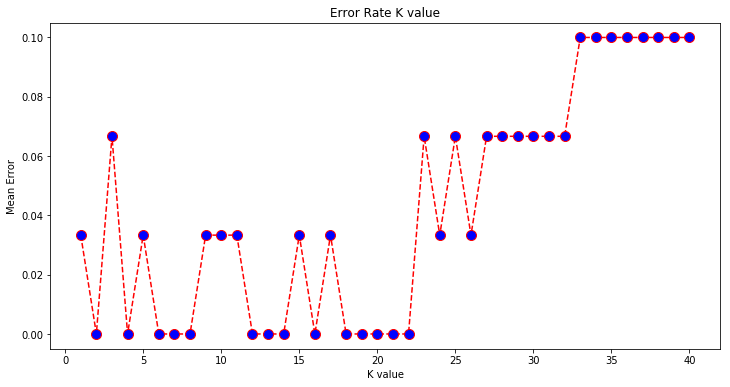

In [42]:
#creating plot to check error values against K values
plt.figure(figsize = (12 , 6))
plt.plot(range(1,41),error,color = 'red', linestyle = 'dashed',marker = 'o', markerfacecolor = 'blue',markersize = 10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')